<a href="https://colab.research.google.com/github/KarthikAmuthrui/Assessments/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imporing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the datasets

df_users = pd.read_csv('takehome_users.csv',encoding='ISO-8859-1')

In [3]:
df_users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
# put zero for NaN values
df_users = df_users.fillna(0)

In [6]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [7]:
df_users['org_id'].nunique()

417

In [8]:
df_users['org_id'].value_counts().head(10)

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
Name: org_id, dtype: int64

In [9]:
df_users['invited_by_user_id'].value_counts().head(10)

0.0        5583
10741.0      13
2527.0       12
1525.0       11
2308.0       11
11770.0      11
2354.0       10
10628.0      10
7012.0       10
4803.0       10
Name: invited_by_user_id, dtype: int64

In [10]:
# The users who invited the most users , 11770
df_users[(df_users['object_id'] == 10741) | (df_users['object_id'] == 2527) | (df_users['object_id'] == 2308)|
         (df_users['object_id'] == 1525)| (df_users['object_id'] == 11770)]['name']

1524         Kay Alice
2307       Melo Leonor
2526     Ribeiro Diego
10740    Tennant Piper
11769    Barbosa Tiago
Name: name, dtype: object

In [11]:
print(len(df_users[df_users.email == None]))

0


In [12]:
df_users['opted_in_to_mailing_list'].value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

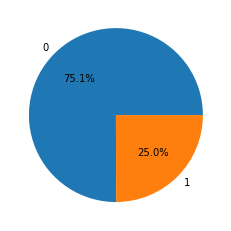

In [13]:
# Create a pie chart

# create dataframe for creation source
df_mail = df_users['opted_in_to_mailing_list'].value_counts()
df_mail = df_mail.reset_index()

# Put parameter values
plt.pie(df_mail['opted_in_to_mailing_list'],labels=df_mail['index'],shadow=False, startangle=0, autopct='%1.1f%%')
plt.show()

25% of the users opted in to mailing list

In [14]:
df_users['enabled_for_marketing_drip'].value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

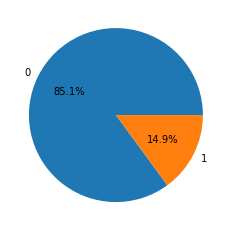

In [15]:
# Create a pie chart

# create dataframe for creation source
df_drip = df_users['enabled_for_marketing_drip'].value_counts()
df_drip = df_drip.reset_index()

# Put parameter values
plt.pie(df_drip['enabled_for_marketing_drip'],labels=df_drip['index'],shadow=False,startangle=0,autopct='%1.1f%%')

plt.show()

15% of the users enabled for marketing drip

In [16]:
df_users['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

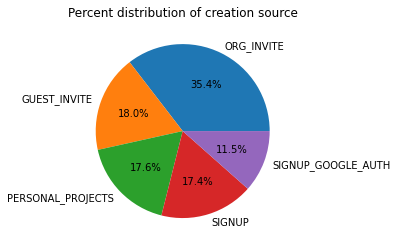

In [17]:
# Create a pie chart

# create dataframe for creation source
df_source = df_users['creation_source'].value_counts()
df_source = df_source.reset_index()

# Put parameter values
plt.pie(df_source['creation_source'],labels=df_source['index'], shadow=False, startangle=0,autopct='%1.1f%%')
plt.title('Percent distribution of creation source')
plt.show()

In [18]:
df_user_eng = pd.read_csv('takehome_user_engagement.csv')

In [19]:
df_user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [20]:
df_user_eng['user_id'].value_counts().head(10)

3623    606
906     600
1811    593
7590    590
8068    585
9402    581
4022    580
3269    566
9312    547
7210    545
Name: user_id, dtype: int64

In [21]:
#the top 3 users:
df_users[(df_users['object_id'] == 3623) | (df_users['object_id'] == 906) | (df_users['object_id'] == 1811)]['name']

905       Becker Jessika
1810    Carvalho Eduardo
3622        Melo Vitória
Name: name, dtype: object

In [22]:
# convert string time stamp into datetime
df_user_eng['time_stamp'] = pd.to_datetime(df_user_eng['time_stamp'])

# change index to time_stamp column for grouper function (later on)
df_user_eng.index = pd.to_datetime(df_user_eng.time_stamp, unit='D')

In [23]:
# create dataframe with users that has logged into the product on three separate days in at least one sevenday period
df_adoption = df_user_eng.groupby(['user_id', pd.Grouper(freq='7D')]).filter(lambda x: len(x)>1).groupby('user_id').sum()

# reset index
df_adoption = df_adoption.reset_index()

In [24]:
df_adoption.head()

,user_id,visited
0,2,4
1,10,277
2,20,2
3,25,2
4,33,12


In [25]:
# merge users and adopted users dataframe
df = df_users.merge(df_adoption, left_on='object_id', right_on='user_id', how='outer')

In [26]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,4.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN,NaN


In [27]:
# drop column user_id since it is duplicate with object_id
df.drop('user_id', axis=1, inplace=True)

In [28]:
# replace NaN with zero
df = df.fillna(0)

In [29]:
from datetime import datetime
# convert unix timestamp to datetime
df['last_session_creation_time'] = df['last_session_creation_time'].apply(
    lambda x: datetime.strptime(str(datetime.fromtimestamp(float(int(x)))), '%Y-%m-%d %H:%M:%S'))
df['creation_time'] = df['creation_time'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))

In [30]:
#calculate active days
df['days_since_signup'] = df['last_session_creation_time'] - df['creation_time']
df['days_since_signup'] = df['days_since_signup'].apply(lambda x: abs(x.total_seconds()/60/60/24/30)) 


In [31]:
# create column adopted_user
df['adopted_user']=df['visited'].apply(lambda x: int(x > 0))

In [32]:
# column visited is not needed
df.drop('visited', axis=1, inplace=True)

In [33]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,days_since_signup,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.000000,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,4.533333,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.000000,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.033333,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.166667,0


In [34]:
df = df.drop(['object_id'], axis = 1)
df = df.drop(['name'],axis =1)
df = df.drop(['email'], axis =1)

In [35]:
df['invited_by_user_id'] = df['invited_by_user_id'].fillna(0)

In [36]:
df['days_since_creation'] = (df_user_eng['time_stamp'].max() - df['creation_time']).dt.days

In [37]:
df = df.drop(['creation_time'], axis = 1)
df = df.drop(['last_session_creation_time'],axis =1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   org_id                      12000 non-null  int64  
 4   invited_by_user_id          12000 non-null  float64
 5   days_since_signup           12000 non-null  float64
 6   adopted_user                12000 non-null  int64  
 7   days_since_creation         12000 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 843.8+ KB


In [39]:
#convert creation_source into numeric values using pd.get_dummies
df = pd.get_dummies(df, columns=['creation_source'])

In [40]:
df.head(3)

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,days_since_signup,adopted_user,days_since_creation,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803.0,0.000000,0,45,1,0,0,0,0
1,0,0,1,316.0,4.533333,1,203,0,1,0,0,0
2,0,0,94,1525.0,0.000000,0,443,0,1,0,0,0


In [41]:
df.corr()['adopted_user']

opted_in_to_mailing_list              0.012665
enabled_for_marketing_drip            0.010439
org_id                                0.075222
invited_by_user_id                    0.030244
days_since_signup                    -0.255942
adopted_user                          1.000000
days_since_creation                   0.066437
creation_source_GUEST_INVITE          0.052294
creation_source_ORG_INVITE           -0.006683
creation_source_PERSONAL_PROJECTS    -0.084885
creation_source_SIGNUP                0.011517
creation_source_SIGNUP_GOOGLE_AUTH    0.034583
Name: adopted_user, dtype: float64

splitting the data into X and y and build the model

In [42]:
#importing the required models and metrics to evaluate the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,plot_confusion_matrix

In [43]:
columns = ['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'days_since_signup', 'days_since_creation',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH']

In [47]:
#splitting the dataset into  X, y
y = df['adopted_user']
X = df[columns]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [49]:
#creating the object for the model
lr = LogisticRegression()
ss = StandardScaler()

In [50]:
#scaling the data
X_train = ss.fit_transform(X_train)
x_test = ss.transform(X_test)

In [51]:
#fit the model for training data

lr.fit(X_train,y_train)

LogisticRegression()

In [52]:
print('train score:',lr.score(X_train,y_train))
print('test score:',lr.score(X_test,y_test))

train score: 0.8351190476190476
test score: 0.5741666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [53]:
#print the accuracy of the model
y_pred = lr.predict(X_test)
print('Accuracy score:', accuracy_score(y_pred,y_test))

Accuracy score: 0.5741666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


we get an accuracy of 0.574

In [54]:
# Print importance of each features
lr.fit(X_train / np.std(X_train, 0), y_train)
print("Regression coefficients: ", lr.coef_)
print('---------------------')
print("Intecept: ", lr.intercept_) 


Regression coefficients:  [[ 0.02698479 -0.01877656  0.18879514 -0.02545659 -1.63394862  0.23466458
   0.11204567 -0.00473237  0.03037203 -0.10788754 -0.03603294]]
---------------------
Intecept:  [-2.24081592]


In [55]:
coefficients = [lr.coef_[0][i] for i in range(11)]
columns = ['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'days_since_signup', 'days_since_creation',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH']

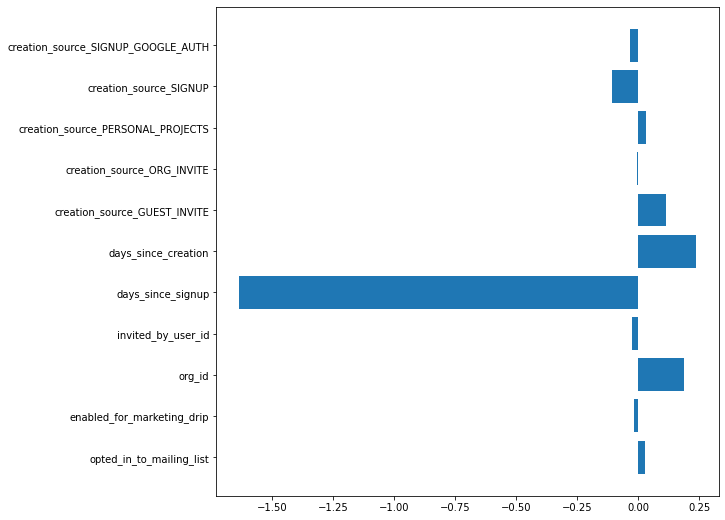

In [56]:
plt.figure(figsize= (9,9))
plt.barh(columns,coefficients)
plt.show()

The top 5 important features seem to be:

1.days_since_creation

2.org_id

3.creation_source_GUEST_INVITE

4.opted_in_to_mailing_list and

5.creation_source_PERSONAL_PROJECTS
